In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from math import log10, sqrt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving download.jpg to download (4).jpg


In [ ]:
image = cv2.imread('download.jpg')

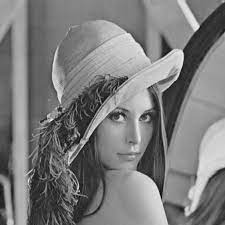

In [ ]:
cv2_imshow(image)

In [ ]:

greyscale_image = cv2.imread('download.jpg',cv2.IMREAD_GRAYSCALE)

*Resizing image to multiple of 3X3 image*

In [ ]:
row_size, column_size = greyscale_image.shape
new_row_size = ((row_size+2)//3)*3
new_col_size = ((column_size+2)//3)*3
greyscale_image = cv2.resize(greyscale_image, (new_row_size,new_col_size), interpolation = cv2.INTER_NEAREST)
# greyscale_image = cv2.resize(greyscale_image, (12,12), interpolation = cv2.INTER_NEAREST)
greyscale_image = np.array(greyscale_image)

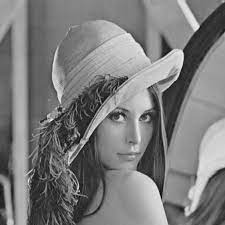

In [ ]:

cv2_imshow(greyscale_image)

In [ ]:

row_size, column_size = greyscale_image.shape

print(row_size)
print(column_size)

225
225


# **Extended LBP**  Local binary pattern

In [ ]:
def getKthImage(image,k):
  row,col = image.shape
  gcs=[]
  result=[["GC" for i in range(col)] for i in range(row)]
  for i in range(1,row,3):
    for j in range(1,col,3):
      gcs.append([i,j])
  if k==1:
    for i in range(len(gcs)):
      x = gcs[i][0]
      y = gcs[i][1]
      for l in range((x//3)*3,(x//3)*3+3):
        for r in range((y//3)*3,(y//3)*3+3):
          if(l!=x or r!=y):
            result[l][r]= str(0 if image[l][r]<image[x][y] else 1)
          else:
            result[l][r]=str(image[x][y])

  else:
    for i in range(len(gcs)):
      x = gcs[i][0]
      y = gcs[i][1]
      for l in range((x//3)*3,(x//3)*3+3):
        for r in range((y//3)*3,(y//3)*3+3):
          if(l!=x or r!=y):
            result[l][r]=str(0 if image[l][r]<image[x][y] else 1)
            diff = min((abs(int(image[l][r])-int(image[x][y]))),2**(k-1)-1)
            binary_rep = np.binary_repr(diff,k-1)
            result[l][r]+=binary_rep
          else:
            result[l][r]=str(image[x][y])
  return result
  

In [ ]:
def getPixelValue(cell,gc):
  if(cell == gc):
    return int(gc)
  ans=int(gc)
  if cell[0]=='0':
    if(len(cell) > 1):
      ans-=int(cell[1:],2)
    else:
      ans-=1
     
  elif(len(cell) > 1):
    ans+=int(cell[1:],2)
  return ans


In [ ]:
def getFinalImage(image):
  row = len(image)
  col = len(image[0])
  result=[[0 for i in range(col)] for i in range(row)]
  for i in range(row):
    for j in range(col):
      gc = image[(i//3)*3+1][(j//3)*3+1]
      result[i][j]=getPixelValue(image[i][j],gc)
  return np.array(result)

In [ ]:
img1 = getKthImage(greyscale_image,1)
img2 = getKthImage(greyscale_image,2)
img3 = getKthImage(greyscale_image,3)
img4 = getKthImage(greyscale_image,4)
img5 = getKthImage(greyscale_image,5)
img6 = getKthImage(greyscale_image,6)
img7 = getKthImage(greyscale_image,7)
img8 = getKthImage(greyscale_image,8)
img9 = getKthImage(greyscale_image,9)

In [ ]:
image1 = getFinalImage(img1)
image2 = getFinalImage(img2)
image3 = getFinalImage(img3)
image4 = getFinalImage(img4)
image5 = getFinalImage(img5)
image6 = getFinalImage(img6)
image7 = getFinalImage(img7)
image8 = getFinalImage(img8)
image9 = getFinalImage(img9)

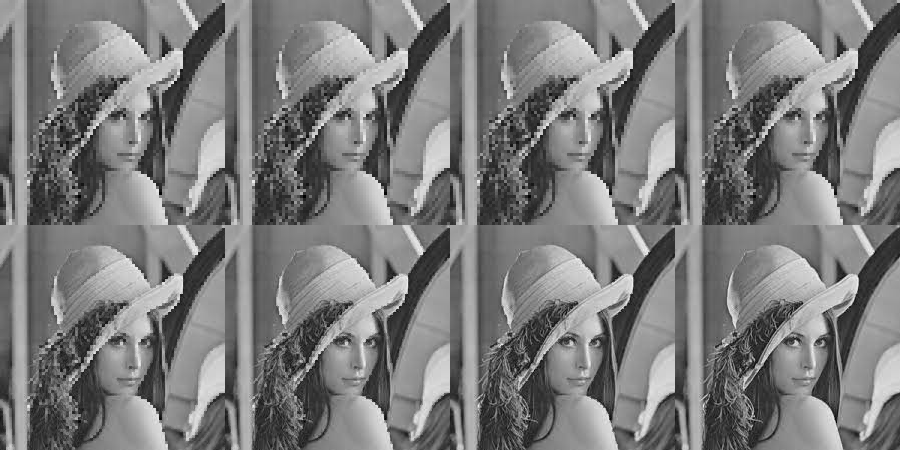

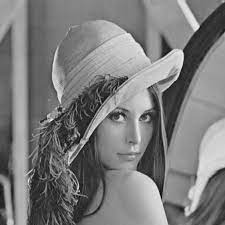

In [ ]:
horizontal1 = np.concatenate((image1,image2,image3,image4), axis = 1)
horizontal2 = np.concatenate((image5,image6,image7,image8), axis = 1)
final = np.concatenate((horizontal1,horizontal2), axis = 0)
cv2_imshow(final)
cv2_imshow(image9)

In [ ]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
psnr1 = PSNR(greyscale_image,image1)
psnr2 = PSNR(greyscale_image,image2)
psnr3 = PSNR(greyscale_image,image3)
psnr4 = PSNR(greyscale_image,image4)
psnr5 = PSNR(greyscale_image,image5)
psnr6 = PSNR(greyscale_image,image6)
psnr7 = PSNR(greyscale_image,image7)
psnr8 = PSNR(greyscale_image,image8)
psnr9 = PSNR(greyscale_image,image9)

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (50, 280)
  
# fontScale
fontScale = 0.6

color = (255, 255, 255)
  
# Line thickness of 2 px
thickness = 2

In [ ]:
image1 = cv2.resize(image1, (300,300), interpolation = cv2.INTER_NEAREST)
image1 = cv2.putText(image1, "IMAGE-1 PSNR: "+str(np.round(psnr1,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)
image2 = cv2.resize(image2, (300,300), interpolation = cv2.INTER_NEAREST)
image2 = cv2.putText(image2, "IMAGE-2 PSNR: "+str(np.round(psnr2,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)
image3 = cv2.resize(image3, (300,300), interpolation = cv2.INTER_NEAREST)
image3 = cv2.putText(image3, "IMAGE-3 PSNR: "+str(np.round(psnr3,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)
image4 = cv2.resize(image4, (300,300), interpolation = cv2.INTER_NEAREST)
image4 = cv2.putText(image4, "IMAGE-4 PSNR: "+str(np.round(psnr4,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)
image5 = cv2.resize(image5, (300,300), interpolation = cv2.INTER_NEAREST)
image5 = cv2.putText(image5, "IMAGE-5 PSNR: "+str(np.round(psnr5,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)
image6 = cv2.resize(image6, (300,300), interpolation = cv2.INTER_NEAREST)
image6 = cv2.putText(image6, "IMAGE-6 PSNR: "+str(np.round(psnr6,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)
image7 = cv2.resize(image7, (300,300), interpolation = cv2.INTER_NEAREST)
image7 = cv2.putText(image7, "IMAGE-7 PSNR: "+str(np.round(psnr7,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)
image8 = cv2.resize(image8, (300,300), interpolation = cv2.INTER_NEAREST)
image8 = cv2.putText(image8, "IMAGE-8 PSNR: "+str(np.round(psnr8,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)
image9 = cv2.resize(image9, (300,300), interpolation = cv2.INTER_NEAREST)
image9 = cv2.putText(image9, "IMAGE-9 PSNR: "+str(np.round(psnr9,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)

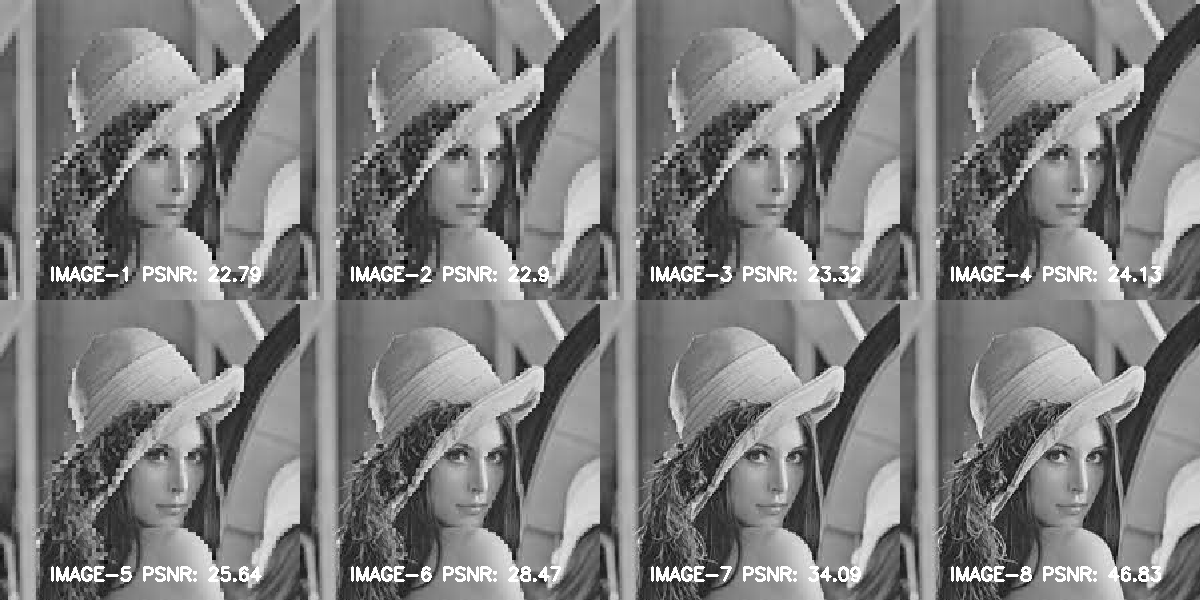

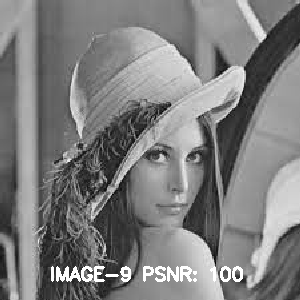

In [ ]:
horizontal1 = np.concatenate((image1,image2,image3,image4), axis = 1)
horizontal2 = np.concatenate((image5,image6,image7,image8), axis = 1)
final = np.concatenate((horizontal1,horizontal2), axis = 0)
cv2_imshow(final)
cv2_imshow(image9)

# **New Scheme Bit Plane Method**

In [ ]:
def convert_binary(image) :
  arr = []
  for i in range(row_size) :
    for j in range(column_size) :
      arr.append(np.binary_repr(image[i][j], width=8))
  return arr

In [ ]:
def get_bit_plane(plane_index, image) :
  bit_arr = [int(pixel[plane_index]) for pixel in image]
  return np.array(bit_arr)

In [ ]:
image = convert_binary(greyscale_image)

In [ ]:
bit_plane_0 = get_bit_plane(0,image)
bit_plane_1 = get_bit_plane(1,image)
bit_plane_2 = get_bit_plane(2,image)
bit_plane_3 = get_bit_plane(3,image)
bit_plane_4 = get_bit_plane(4,image)
bit_plane_5 = get_bit_plane(5,image)
bit_plane_6 = get_bit_plane(6,image)
bit_plane_7 = get_bit_plane(7,image)

In [ ]:
def get_combination(*bitplanes) :
  result = None
  length = len(bitplanes)
  for i in range(length-1):
    index = 7-i
    if result is None:
      result=bitplanes[i]*(2**index)
    else:
      result=result+bitplanes[i]*(2**index)
  k = (bitplanes[-1]*(2**(8-length)))+2**(7-length)
  if result is None:
    result = k
  else:
    result = result + k
  return np.floor(result) 

In [ ]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
image0 = get_combination(bit_plane_0)
img0 = np.reshape(image0, (row_size, column_size))
psnr0 = PSNR(greyscale_image,img0)

In [ ]:
image1 = get_combination(bit_plane_0,bit_plane_1)
img1 = np.reshape(image1, (row_size, column_size))
psnr1 = PSNR(greyscale_image,img1)

In [ ]:
image2 = get_combination(bit_plane_0,bit_plane_1,bit_plane_2)
img2 = np.reshape(image2, (row_size, column_size))
psnr2 = PSNR(greyscale_image,img2)

In [ ]:
image3 = get_combination(bit_plane_0,bit_plane_1,bit_plane_2,bit_plane_3)
img3 = np.reshape(image3, (row_size, column_size))
psnr3 = PSNR(greyscale_image,img3)

In [ ]:
image4 = get_combination(bit_plane_0,bit_plane_1,bit_plane_2,bit_plane_3,bit_plane_4)
img4 = np.reshape(image4, (row_size, column_size))
psnr4 = PSNR(greyscale_image,img4)

In [ ]:
image5 = get_combination(bit_plane_0,bit_plane_1,bit_plane_2,bit_plane_3,bit_plane_4,bit_plane_5)
img5 = np.reshape(image5, (row_size, column_size))
psnr5 = PSNR(greyscale_image,img5)

In [ ]:
image6 = get_combination(bit_plane_0,bit_plane_1,bit_plane_2,bit_plane_3,bit_plane_4,bit_plane_5,bit_plane_6)
img6 = np.reshape(image6, (row_size, column_size))
psnr6 = PSNR(greyscale_image,img6)

In [ ]:
image7 = get_combination(bit_plane_0,bit_plane_1,bit_plane_2,bit_plane_3,bit_plane_4,bit_plane_5,bit_plane_6,bit_plane_7)
img7 = np.reshape(image7, (row_size, column_size))
psnr7 = PSNR(greyscale_image,img7)

In [ ]:
# horizontal1 = np.concatenate((img0,img1,img2,img3), axis = 1)
# horizontal2 = np.concatenate((img4,img5,img6,img7), axis = 1)
# cv2_imshow(horizontal1)
# cv2_imshow(horizontal2)

# cv2_imshow(img0)
# cv2_imshow(img1)
# cv2_imshow(img2)
# cv2_imshow(img3)
# cv2_imshow(img4)
# cv2_imshow(img5)
# cv2_imshow(img6)
# cv2_imshow(img7)


In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (50, 280)
  
# fontScale
fontScale = 0.6

color = (255, 255, 255)
  
# Line thickness of 2 px
thickness = 2

In [ ]:
img0 = cv2.resize(img0, (300,300), interpolation = cv2.INTER_NEAREST)
img0 = cv2.putText(img0, "IMAGE-0 PSNR: "+str(np.round(psnr0,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)
img1 = cv2.resize(img1, (300,300), interpolation = cv2.INTER_NEAREST)
img1 = cv2.putText(img1, "IMAGE-1 PSNR: "+str(np.round(psnr1,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)
img2 = cv2.resize(img2, (300,300), interpolation = cv2.INTER_NEAREST)
img2 = cv2.putText(img2, "IMAGE-2 PSNR: "+str(np.round(psnr2,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)
img3 = cv2.resize(img3, (300,300), interpolation = cv2.INTER_NEAREST)
img3 = cv2.putText(img3, "IMAGE-3 PSNR: "+str(np.round(psnr3,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)
img4 = cv2.resize(img4, (300,300), interpolation = cv2.INTER_NEAREST)
img4 = cv2.putText(img4, "IMAGE-4 PSNR: "+str(np.round(psnr4,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)
img5 = cv2.resize(img5, (300,300), interpolation = cv2.INTER_NEAREST)
img5 = cv2.putText(img5, "IMAGE-5 PSNR: "+str(np.round(psnr5,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)
img6 = cv2.resize(img6, (300,300), interpolation = cv2.INTER_NEAREST)
img6 = cv2.putText(img6, "IMAGE-6 PSNR: "+str(np.round(psnr6,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)
img7 = cv2.resize(img7, (300,300), interpolation = cv2.INTER_NEAREST)
img7 = cv2.putText(img7, "IMAGE-7 PSNR: "+str(np.round(psnr7,2)), org, font, fontScale, color, thickness, cv2.LINE_AA)

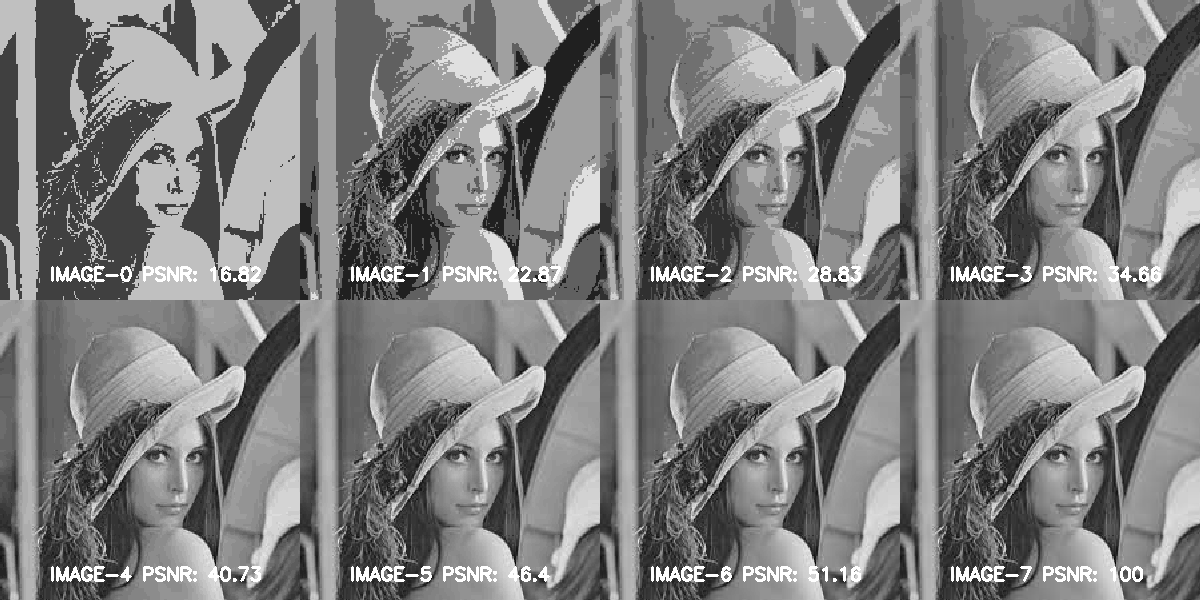

In [ ]:
horizontal1 = np.concatenate((img0,img1,img2,img3), axis = 1)
horizontal2 = np.concatenate((img4,img5,img6,img7), axis = 1)
final = np.concatenate((horizontal1,horizontal2), axis = 0)
cv2_imshow(final)